In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools
from IPython.display import Image

import matplotlib.pyplot as plt
import matplotlib.axes.Axes as ax
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd
from data_info import *
from preprocessing_helpers import *
from datetime import datetime
%matplotlib inline
pd.set_option("display.precision", 2)

In [9]:
np.random.seed(2)
new_cols = ['year',
                   'weekofyear',
                   'reanalysis_relative_humidity_percent',
                   'station_avg_temp_c',
                   'station_diur_temp_rng_c',
                   'station_precip_mm',
                   'sj',
                   'iq']
new_norm = [
                   'reanalysis_relative_humidity_percent',
                   'station_avg_temp_c',
                   'station_diur_temp_rng_c',
                   'station_precip_mm',
]

In [250]:
(train_x, train_y), (test_x, test_y) = split_data(
    extract_data(train_file, CSV_COLUMNS), 
    label_column=None
)
# train_x = preproc_data(train_x, norm_cols=new_norm)
# test_x = preproc_data(test_x, norm_cols=new_norm)
train_x = preproc_data(train_x)

In [251]:
train_y = train_x.pop(LABEL_COLUMN)

train_x.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,iq,sj
511,0.50,0.13,0.18,0.21,0.15,0.15,-0.91,-1.19,-1.60,-1.99,...,-0.91,-1.97,-0.83,-1.89,-0.69,-2.10,-0.97,-0.80,0,1
961,0.50,0.96,0.27,0.17,0.23,0.30,-1.00,1.27,2.22,-2.70,...,-1.00,-2.28,2.26,0.79,1.94,1.29,-0.71,-0.89,1,0
231,0.20,0.75,0.10,0.07,0.12,0.19,-1.08,1.25,1.02,0.09,...,-1.08,0.01,-0.65,1.19,-0.57,0.98,1.49,-0.69,0,1
687,0.65,0.54,-0.06,-0.11,0.22,0.19,0.46,1.08,0.90,0.71,...,0.46,0.64,-0.85,0.22,-1.04,-0.38,-0.26,0.14,0,1
34,0.00,0.98,0.30,0.28,0.17,0.16,-1.10,-0.49,-0.91,-2.03,...,-1.10,-1.97,-0.74,-1.58,-1.06,-1.80,-0.65,-0.39,0,1


In [252]:
X = train_x.to_numpy()
Y = train_y.to_numpy()
# Y = X[:,-3]
tsne_fitting = TSNE(n_components=2, perplexity=25, n_iter=3000, learning_rate=200, metric="braycurtis")

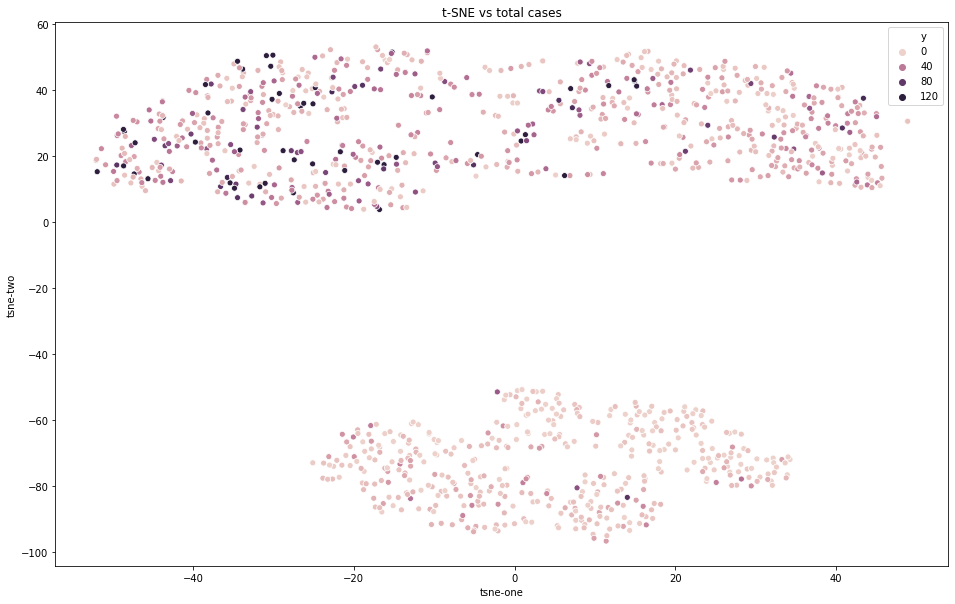

In [253]:
X_embedded = tsne_fitting.fit_transform(X)
cropped_Y = [100 if x > 100 else x for x in Y]
plot_data = pd.DataFrame([])
plot_data['tsne-one'] = X_embedded[:,0]
plot_data['tsne-two'] = X_embedded[:,1]
# plot_data['tsne-three'] = X_embedded[:,2]
plot_data['y'] = cropped_Y
plt.figure(figsize=(16,10))
plt.title('t-SNE vs total cases')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

# ax = plt.figure(figsize=(16,10)).gca(projection='3d')

# cmap = plt.cm.get_cmap("winter")
# cmap.set_under("magenta")
# cmap.set_over("yellow")
# cmap.set_bad("red")
# ax.scatter(
#     xs=plot_data["tsne-one"], 
#     ys=plot_data["tsne-two"], 
#     zs=plot_data["tsne-three"], 
#     c=plot_data["y"],
#     cmap=cmap
# )
# ax.set_xlabel('tsne-one')
# ax.set_ylabel('tsne-two')
# ax.set_zlabel('tsne-three')
# plt.show()

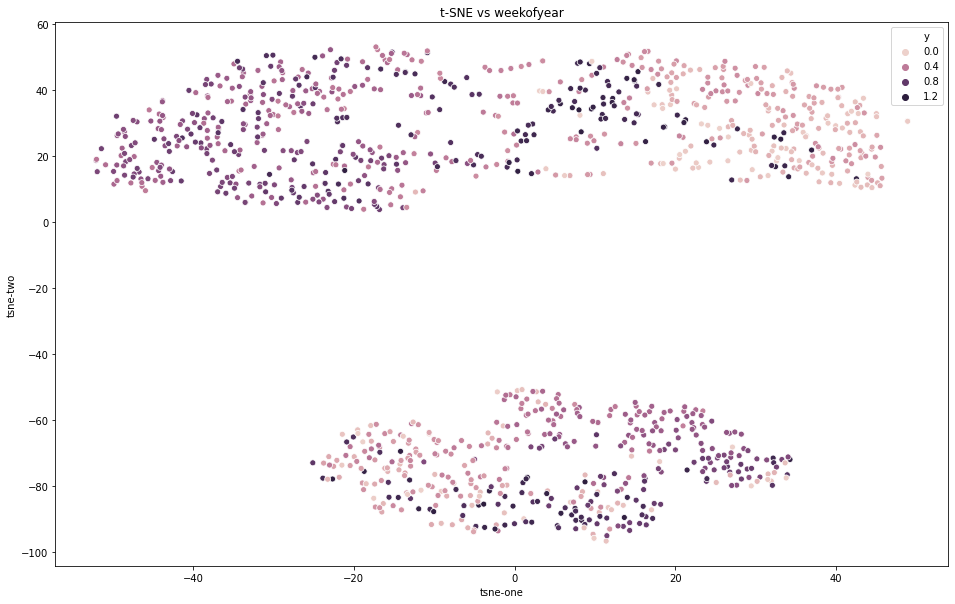

In [254]:
plot_data['y'] = train_x['weekofyear'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs weekofyear')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

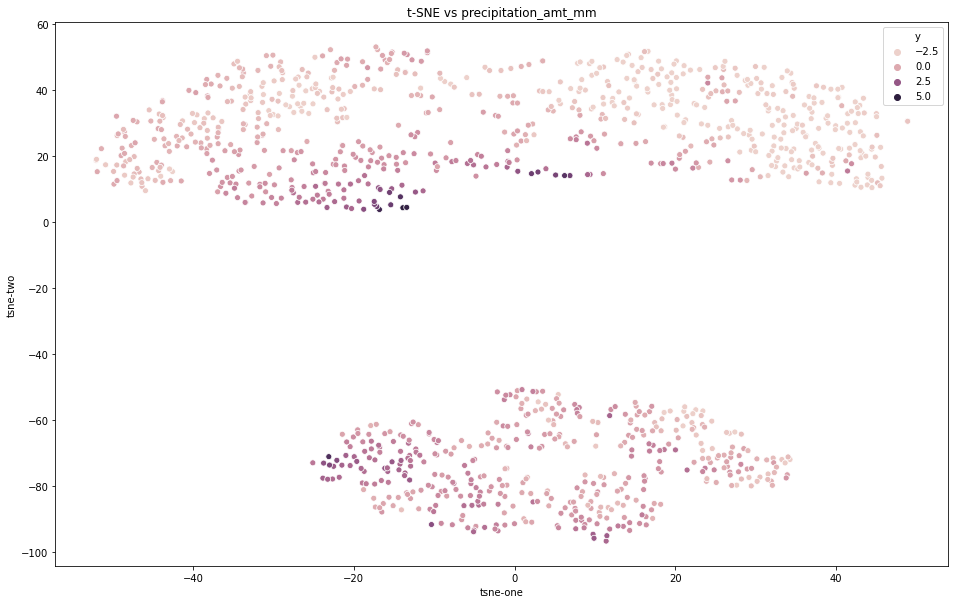

In [255]:
plot_data['y'] = train_x['precipitation_amt_mm'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs precipitation_amt_mm')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

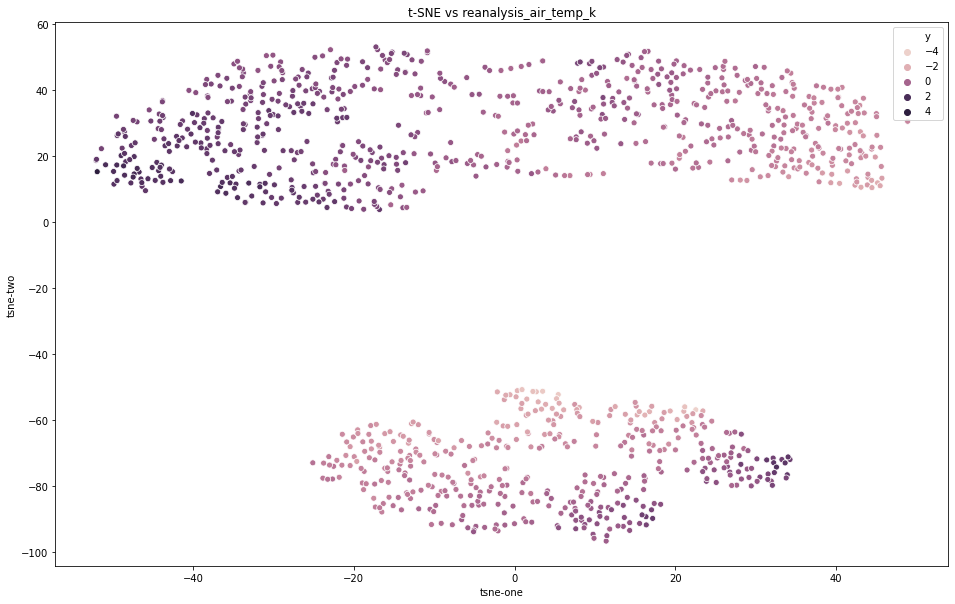

In [256]:
plot_data['y'] = train_x['reanalysis_air_temp_k'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_air_temp_k')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

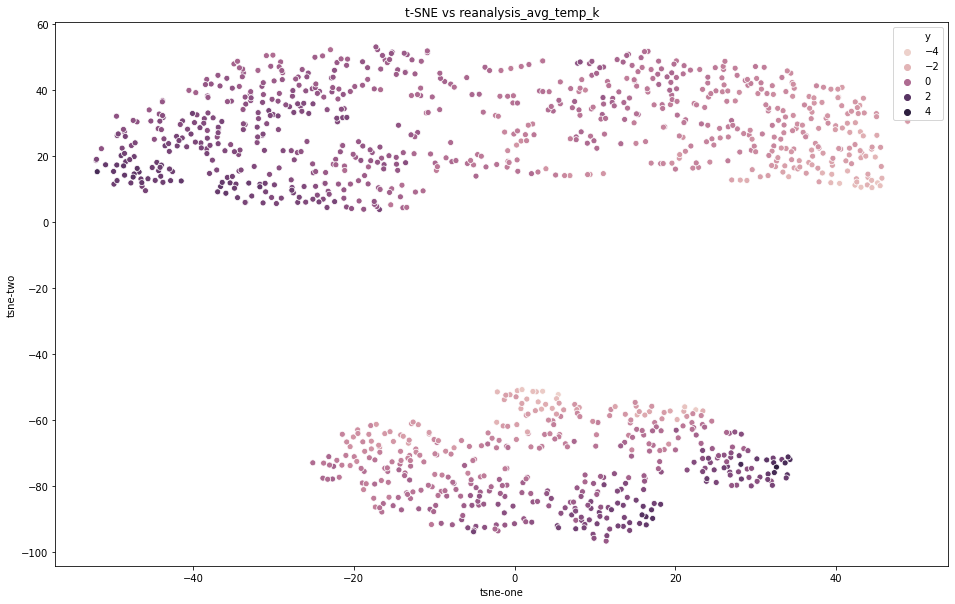

In [257]:
plot_data['y'] = train_x['reanalysis_avg_temp_k'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_avg_temp_k')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

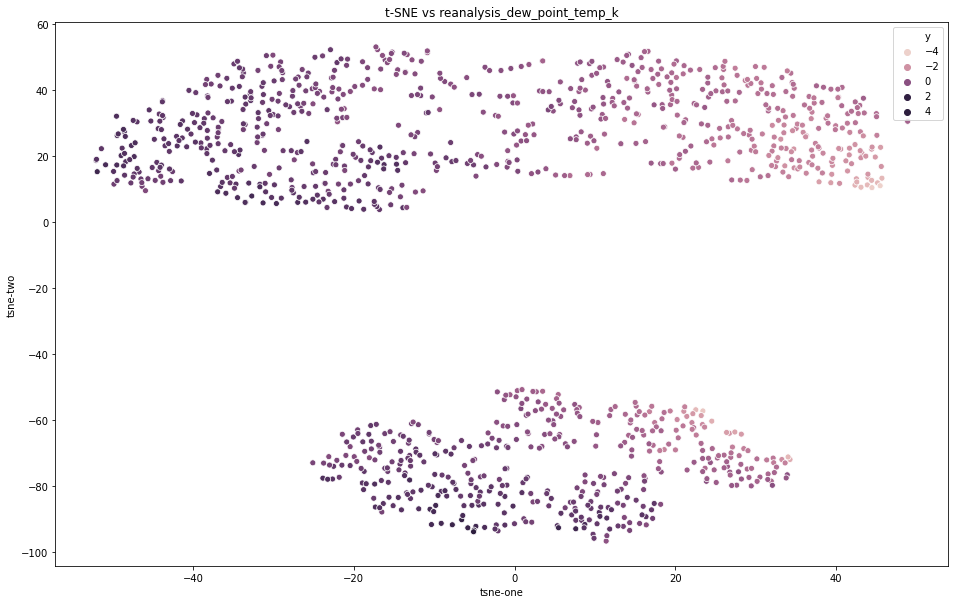

In [258]:
plot_data['y'] = train_x['reanalysis_dew_point_temp_k'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_dew_point_temp_k')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

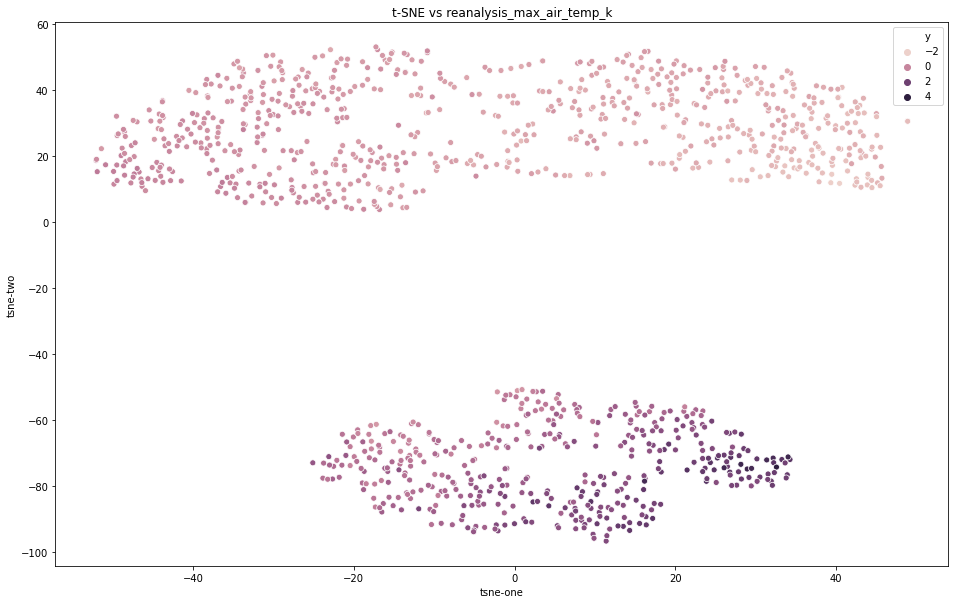

In [259]:
plot_data['y'] = train_x['reanalysis_max_air_temp_k'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_max_air_temp_k')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

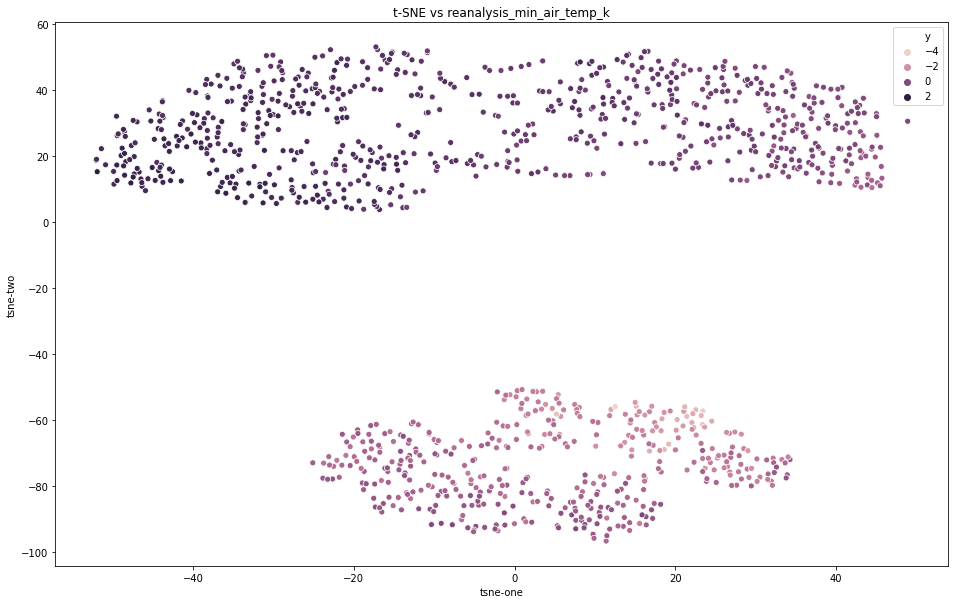

In [260]:
plot_data['y'] = train_x['reanalysis_min_air_temp_k'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_min_air_temp_k')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

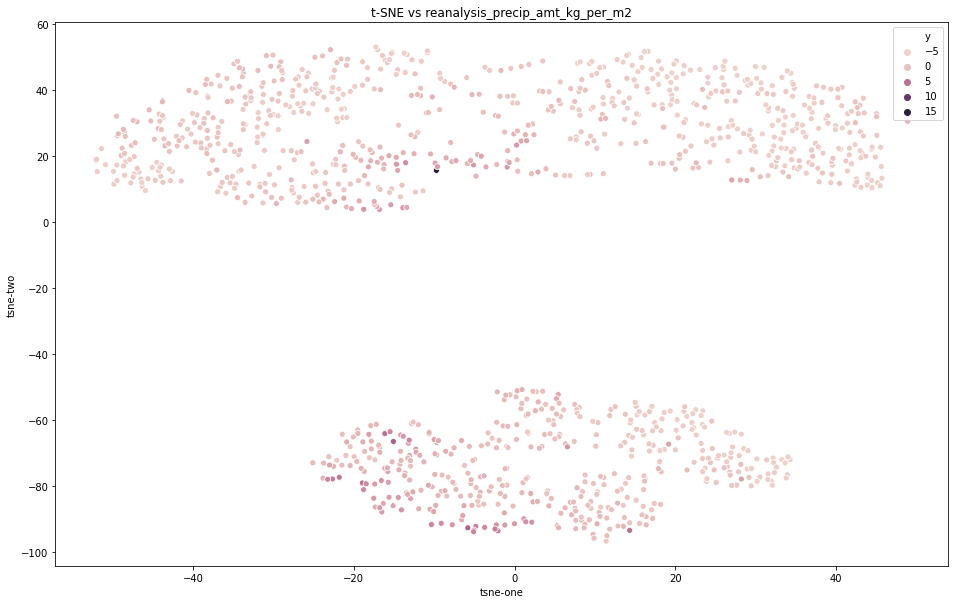

In [261]:
plot_data['y'] = train_x['reanalysis_precip_amt_kg_per_m2'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_precip_amt_kg_per_m2')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

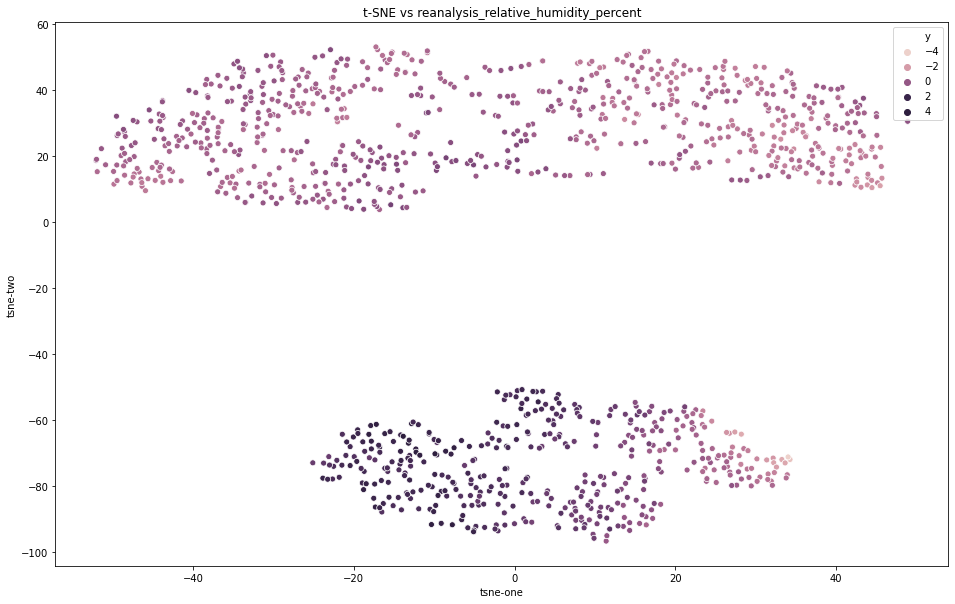

In [262]:
plot_data['y'] = train_x['reanalysis_relative_humidity_percent'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_relative_humidity_percent')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

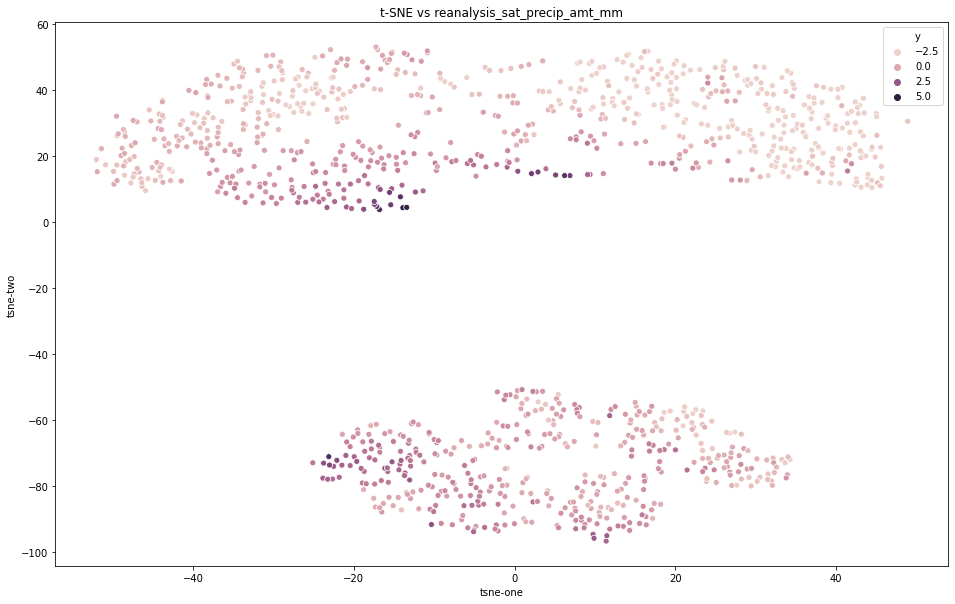

In [263]:
plot_data['y'] = train_x['reanalysis_sat_precip_amt_mm'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_sat_precip_amt_mm')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

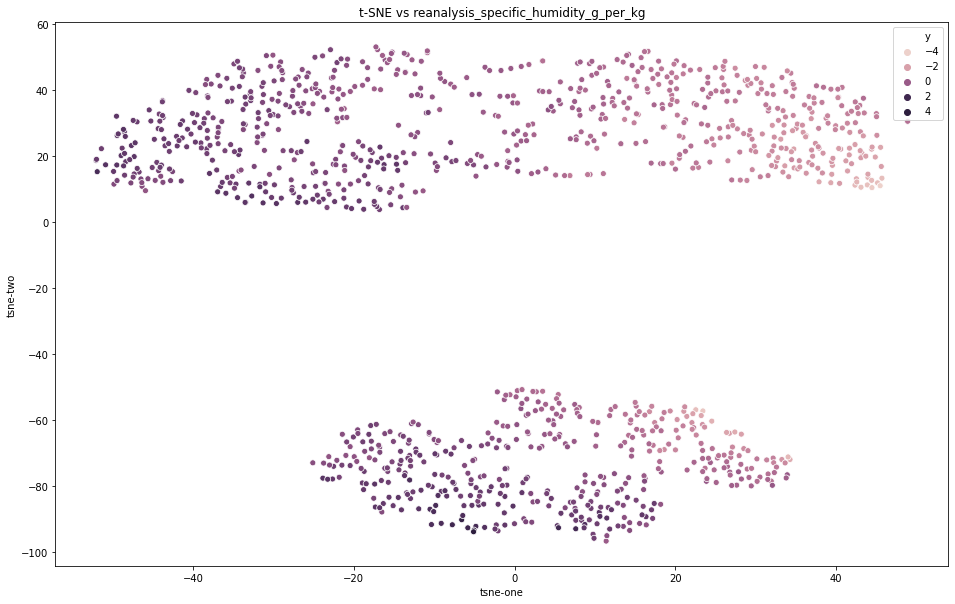

In [264]:
plot_data['y'] = train_x['reanalysis_specific_humidity_g_per_kg'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_specific_humidity_g_per_kg')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

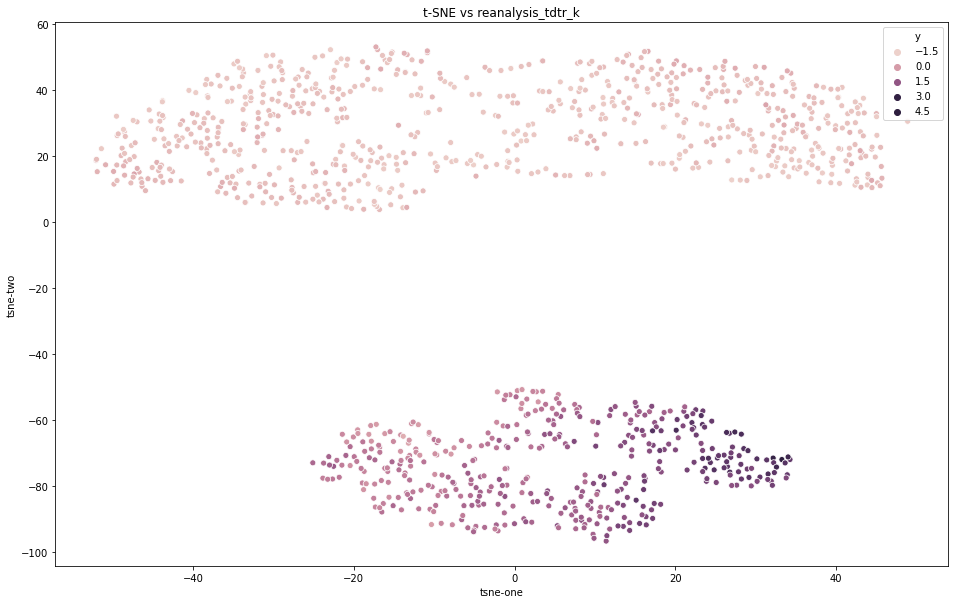

In [265]:
plot_data['y'] = train_x['reanalysis_tdtr_k'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs reanalysis_tdtr_k')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

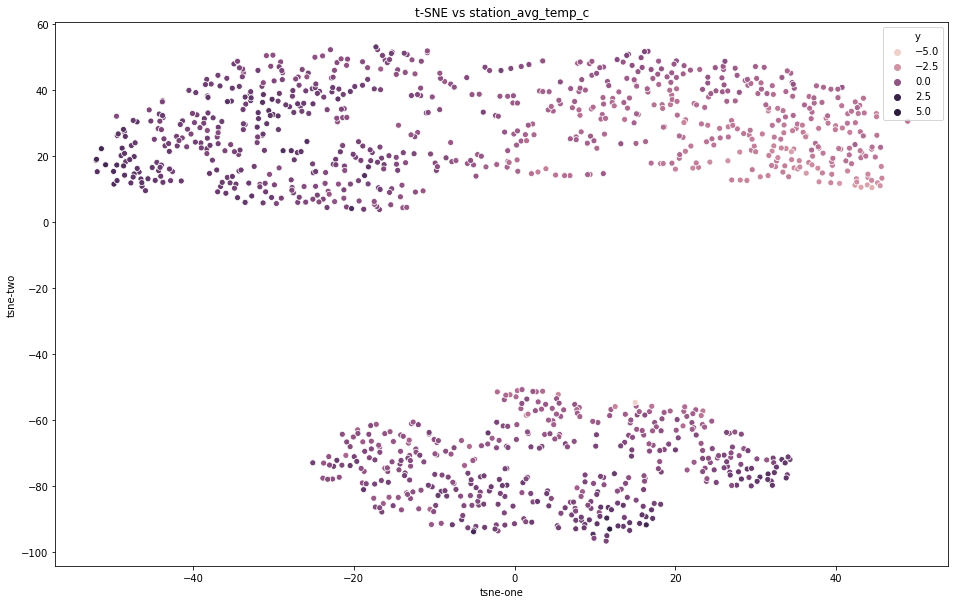

In [266]:
plot_data['y'] = train_x['station_avg_temp_c'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs station_avg_temp_c')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

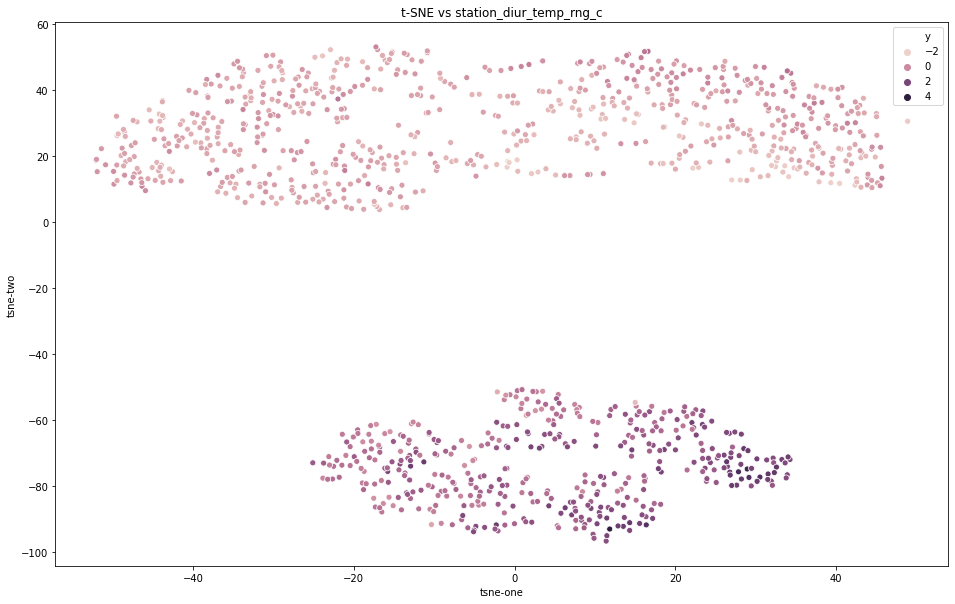

In [267]:
plot_data['y'] = train_x['station_diur_temp_rng_c'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs station_diur_temp_rng_c')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

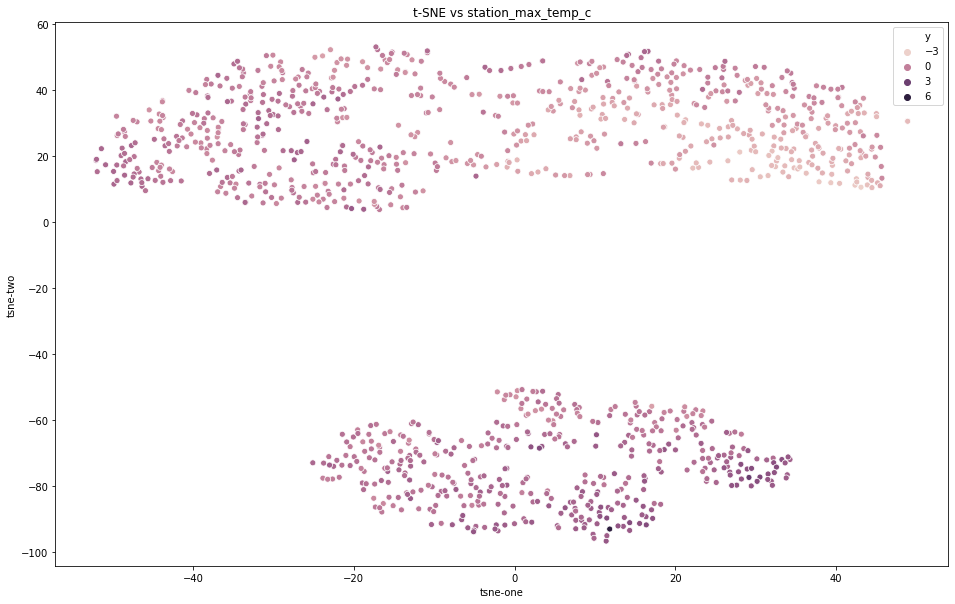

In [268]:
plot_data['y'] = train_x['station_max_temp_c'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs station_max_temp_c')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

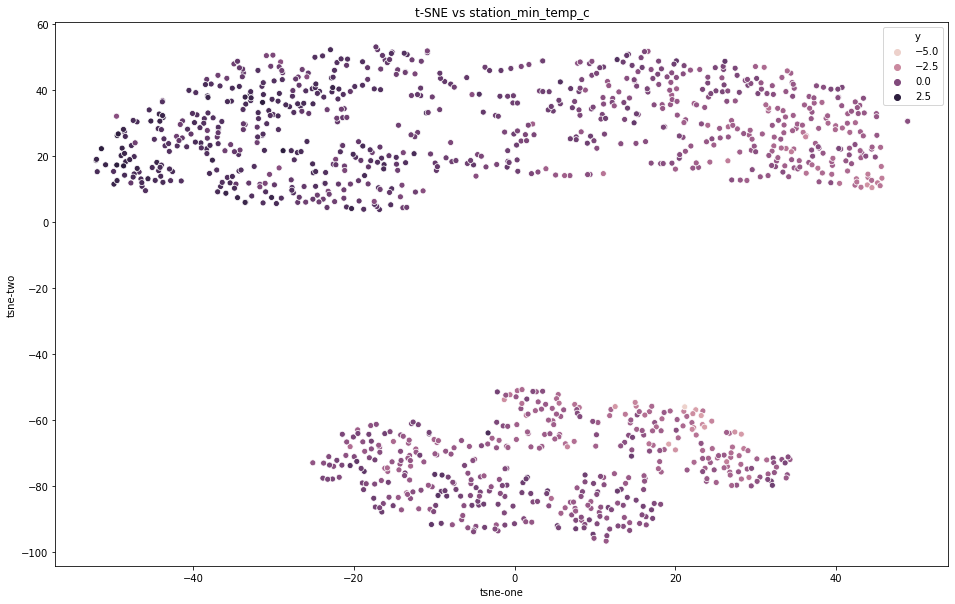

In [269]:
plot_data['y'] = train_x['station_min_temp_c'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs station_min_temp_c')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

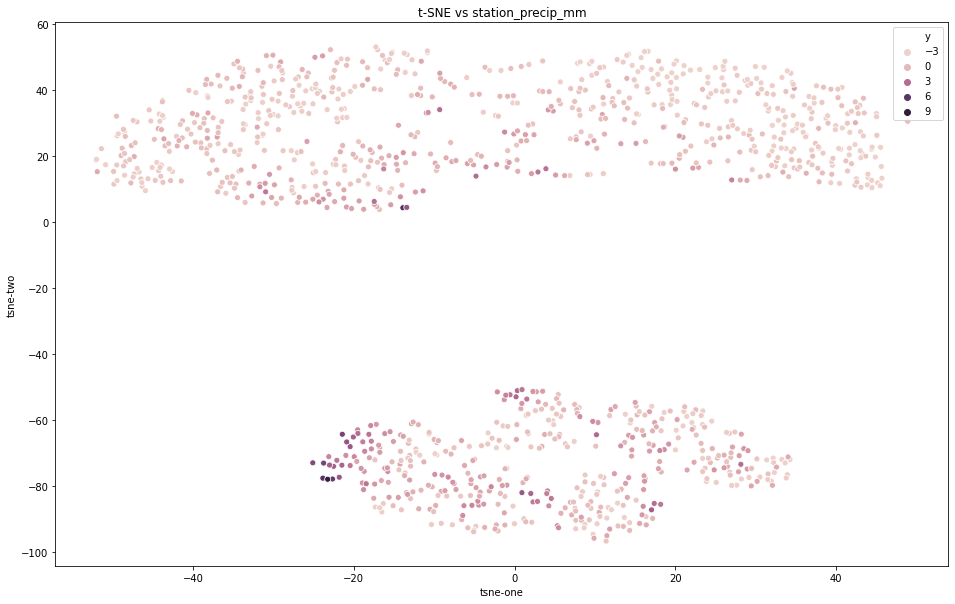

In [270]:
plot_data['y'] = train_x['station_precip_mm'].to_numpy()
plt.figure(figsize=(16,10))
plt.title('t-SNE vs station_precip_mm')
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    data=plot_data,
)

In [7]:
pca = PCA(n_components=2)
X_PCA = pca.fit_transform(X)
X_PCA

array([[ -65.80474958,  -25.41004001],
       [ -74.27209656,  -26.50283154],
       [-102.50723885,  394.15410944],
       ...,
       [ -70.70748855,  -16.80219197],
       [  61.67033672,    0.53302595],
       [   5.28345254,  -22.71653231]])

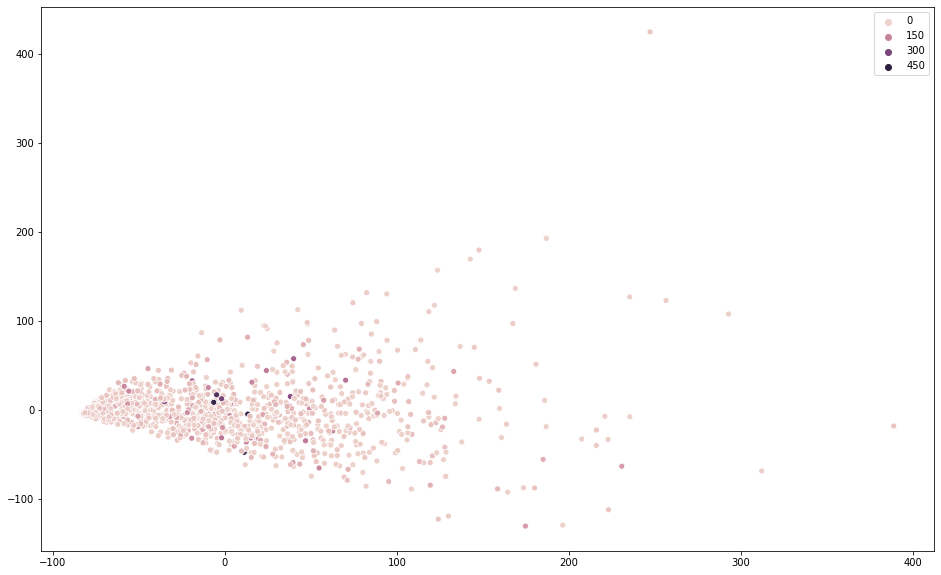

In [42]:
plot_data = {}
plot_data['pca-one'] = X_PCA[:,0]
plot_data['pca-two'] = X_PCA[:,1]
plot_data['y'] = map(lambda x: x if x > 50 else x, train_y.to_numpy())
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    data=plot_data,
)